# 6) Anwendung in Machine Learning
- Entwicklung von Regressions- oder Klassifikationsmodellen,
Performance-Vergleich und –Interpretation

## 6.1 Import der benötigten Bibliotheken & drive mount

In [1]:
# Datenverarbeitung
import pandas as pd
import numpy as np

# Datenvisualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Drive Mount
from google.colab import drive
import os

# File Download
import zipfile
from google.colab import files

# Modellbildung und -bewertung
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Modell speichern
from joblib import dump

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the folder paths
main_folder_path = '/content/drive/MyDrive/wine_project'
training_data_folder_path = os.path.join(main_folder_path, 'training_data')
models_folder_path = os.path.join(main_folder_path, 'models')
plots_folder_path = os.path.join(main_folder_path, 'plots')
model_plots_folder_path = os.path.join(plots_folder_path,'models')

Mounted at /content/drive


## 6.2 Datenvorverarbeitung

In [2]:
# Define the correct path for loading the data from the training_data folder
file_path = os.path.join(training_data_folder_path, 'wine_quality.csv')

# Daten laden
data = pd.read_csv(file_path)

# Features und Zielvariablen definieren
X = data.drop(columns=['quality', 'quality_category'])
y = data['quality_category']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6.3 Modelle trainieren

### 6.3.1 Random Forest Classifier

In [3]:
# Modell initialisieren
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_rf = rf_model.predict(X_test_scaled)

# Reihenfolge der Labels definieren
label_order = ["Sehr gut", "Gut", "Okay", "Schlecht"]

# Classification Report mit der expliziten Reihenfolge der Labels
print("Random Forest Classifier Report")
print(classification_report(
    y_test,
    y_pred_rf,
    labels=label_order,  # Explizite Reihenfolge angeben
    target_names=label_order
))

Random Forest Classifier Report
              precision    recall  f1-score   support

    Sehr gut       0.00      0.00      0.00         1
         Gut       0.79      0.51      0.62       255
        Okay       0.85      0.97      0.91       995
    Schlecht       1.00      0.10      0.19        49

    accuracy                           0.84      1300
   macro avg       0.66      0.39      0.43      1300
weighted avg       0.84      0.84      0.82      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 6.3.2 Logistic Regression

In [4]:
# Modell initialisieren
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_log = log_model.predict(X_test_scaled)

# Reihenfolge der Labels definieren
label_order = ["Sehr gut", "Gut", "Okay", "Schlecht"]

# Classification Report mit der expliziten Reihenfolge der Labels
print("Logistic Regression Report")
print(classification_report(
    y_test,
    y_pred_log,
    labels=label_order,  # Explizite Reihenfolge angeben
    target_names=label_order
))


Logistic Regression Report
              precision    recall  f1-score   support

    Sehr gut       0.00      0.00      0.00         1
         Gut       0.55      0.24      0.34       255
        Okay       0.80      0.95      0.87       995
    Schlecht       1.00      0.02      0.04        49

    accuracy                           0.78      1300
   macro avg       0.59      0.30      0.31      1300
weighted avg       0.76      0.78      0.73      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 6.3.3 Support Vector Classifier

In [5]:
# Modell initialisieren
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_svc = svc_model.predict(X_test_scaled)

# Reihenfolge der Labels definieren
label_order = ["Sehr gut", "Gut", "Okay", "Schlecht"]

# Classification Report mit der expliziten Reihenfolge der Labels
print("Support Vector Classifier Report")
print(classification_report(
    y_test,
    y_pred_svc,
    labels=label_order,  # Explizite Reihenfolge angeben
    target_names=label_order
))

Support Vector Classifier Report
              precision    recall  f1-score   support

    Sehr gut       0.00      0.00      0.00         1
         Gut       0.75      0.26      0.39       255
        Okay       0.80      0.98      0.88       995
    Schlecht       0.00      0.00      0.00        49

    accuracy                           0.80      1300
   macro avg       0.39      0.31      0.32      1300
weighted avg       0.76      0.80      0.75      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6.4 Ergebnisse visualisieren

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


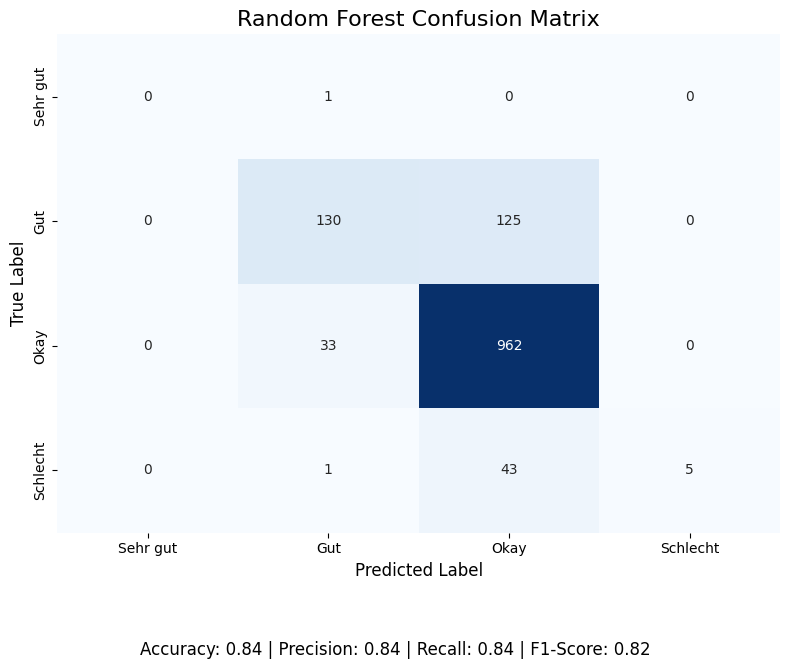

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


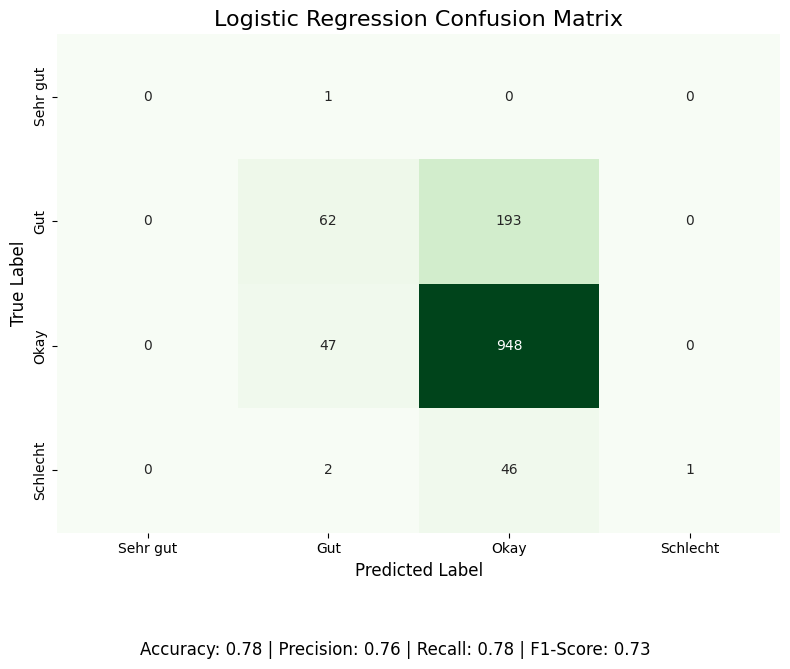

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


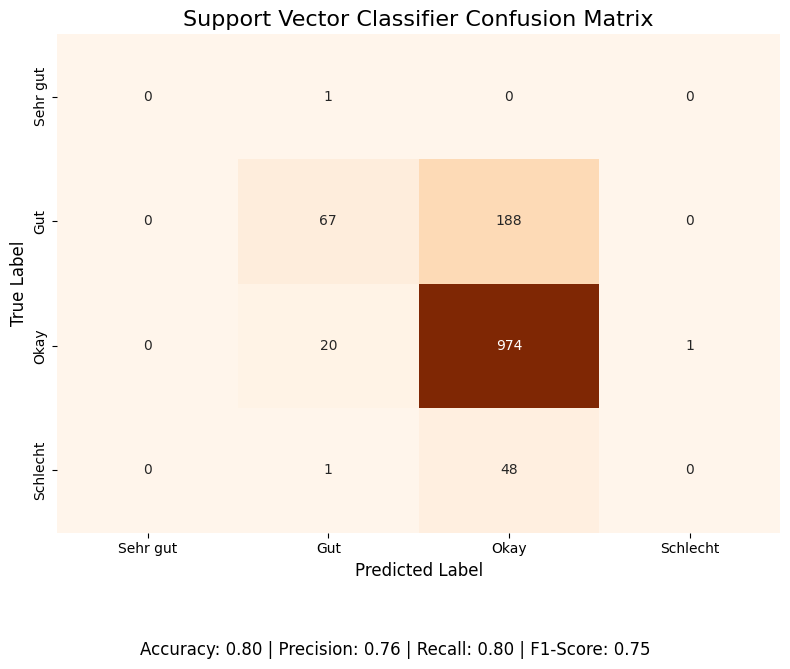

In [6]:
# Plot Funktion
def plot_model_metrics(y_true, y_pred, model_name, labels, cmap, save_path=None):
    # Berechnung der Metriken
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Erstellen des Plots
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()

    # Metriken unterhalb des Plots
    plt.figtext(0.5, -0.1, f"Accuracy: {acc:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-Score: {f1:.2f}",
                wrap=True, horizontalalignment='center', fontsize=12)

    # Optional speichern
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Reihenfolge der Labels definieren
label_order = ["Sehr gut", "Gut", "Okay", "Schlecht"]

# Aufruf der Funktion für jedes Modell & Speichern der Plots
plot_model_metrics(
    y_test, y_pred_rf, 'Random Forest', label_order, 'Blues',
    save_path=os.path.join(model_plots_folder_path, 'random_forest_metrics.png')
)
plot_model_metrics(
    y_test, y_pred_log, 'Logistic Regression', label_order, 'Greens',
    save_path=os.path.join(model_plots_folder_path, 'logistic_regression_metrics.png')
)
plot_model_metrics(
    y_test, y_pred_svc, 'Support Vector Classifier', label_order, 'Oranges',
    save_path=os.path.join(model_plots_folder_path, 'svc_metrics.png')
)


## 6.5 Modelle speichern

In [7]:
# Define the paths for saving the models and scaler
rf_model_path = os.path.join(models_folder_path, 'random_forest_model.joblib')
log_model_path = os.path.join(models_folder_path, 'logistic_regression_model.joblib')
svc_model_path = os.path.join(models_folder_path, 'svc_model.joblib')
scaler_path = os.path.join(models_folder_path, 'scaler.joblib')

# Modelle abspeichern
dump(rf_model, rf_model_path)
dump(log_model, log_model_path)
dump(svc_model, svc_model_path)

# Skaler speichern
dump(scaler, scaler_path)

print("Modelle und Skaler gespeichert!")


Modelle und Skaler gespeichert!


### 6.5.1 Artifakte runterladen

In [8]:
# Define the output zip file path
zip_file_path = os.path.join(main_folder_path, 'wine_project_artifacts.zip')

# Create the zip archive
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    # Add the models folder to the zip file
    for root, dirs, files in os.walk(models_folder_path):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file), main_folder_path))

    # Add the plots folder to the zip file
    for root, dirs, files in os.walk(plots_folder_path):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file), main_folder_path))

print(f"Zipped file created at: {zip_file_path}")

from google.colab import files
files.download(zip_file_path)


Zipped file created at: /content/drive/MyDrive/wine_project/wine_project_artifacts.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **6.6 Analyse der Modelle**

### **1) Random Forest**
#### Stärken:
- **Gute Präzision und Recall** für häufige Klassen, insbesondere **"Okay"** (dominierende Klasse).
- **Wenige Fehlklassifikationen** bei häufigen Klassen.
- Robuste Leistung bei unbalancierten Daten durch Ensemble-Ansatz.

#### Schwächen:
- **Schwierigkeiten mit seltenen Klassen**, wie **"Sehr gut"** und **"Schlecht"**, was zu niedrigen Recall-Werten führt.
- **Fehlklassifikationen in angrenzenden Klassen**, z. B. "Gut" wird öfter als "Okay" vorhergesagt.

---

### **2) Logistic Regression**
#### Stärken:
- **Solide Leistung bei dominierenden Klassen**, insbesondere **"Okay"**.
- Einfaches Modell mit stabilen Vorhersagen für die häufigsten Klassen.
- **Bessere Verteilung der Fehlklassifikationen** als Random Forest bei mittleren Klassen.

#### Schwächen:
- **Höhere Fehlerrate in seltenen Klassen**, insbesondere **"Sehr gut"** und **"Schlecht"**.
- Schwierigkeiten bei der Modellierung komplexer nicht-linearer Zusammenhänge, was sich bei seltenen und schwer unterscheidbaren Klassen zeigt.

---

### **3) Support Vector Classifier (SVC)**
#### Stärken:
- **Hervorragende Präzision für die Hauptklasse** (**"Okay"**) durch klare Trennung der häufigsten Datenpunkte.
- **Minimale Fehlklassifikationen** zwischen den häufigsten Klassen.

#### Schwächen:
- **Schlechte Performance bei seltenen Klassen** (**"Sehr gut"** und **"Schlecht"**), da diese Klassen in der Modellanpassung unterrepräsentiert sind.
- **Überanpassung auf die dominierende Klasse**, was die Fehlerrate bei weniger häufigen Klassen erhöht.
- Komplexität der Modellberechnung bei großen Datenmengen.

---

## **Zusammenfassung der Modelle**
1. Der **Random Forest** zeigt insgesamt die beste Ausgewogenheit zwischen Präzision, Recall und F1-Score, insbesondere bei häufigen Klassen.
2. Die **Logistische Regression** ist ein solider, interpretiertbarer Ansatz, der jedoch Schwierigkeiten bei komplexeren Mustern und seltenen Klassen hat.
3. Der **Support Vector Classifier (SVC)** liefert die beste Präzision für die Hauptklasse, jedoch auf Kosten der Performance in den seltenen Klassen und einer potenziellen Überanpassung.
